# 6. Workshop 1-1 : MNIST - FCDeepNets

> **[ Reference ] :**
 + FRANÇOIS CHOLLET, **Deep Learning with Python**, Chapter 2, Section 1, Manning, 2018. 
(https://tanthiamhuat.files.wordpress.com/2018/03/deeplearningwithpython.pdf)

----

In [1]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())


GPU Available:  True


In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

### [ Hand-written-digit Recognition ] : 
+ A Neural Network which makes use of the Python library Keras to learn to classify hand-written digits. 
+ The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). 
+ The dataset is a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

#### The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# return tuple tyoe

+ `train_images` and `train_labels` form the "training set", the data that the model will learn from. 
+ The model will then be tested on the "test set", `test_images` and `test_labels`. 
+ Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging  from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [5]:
train_images.shape # 60000筆 28*28 pixel 1 channel

(60000, 28, 28)

In [6]:
type(train_images)

numpy.ndarray

In [7]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

##  (1) Neural Network
Our workflow to build a neural network will be as follow: 
 * first we will present our neural network with the training data, `train_images` and `train_labels`. 
 * The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

> + The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. 
 + A deep learning model is like a sieve for data processing, made of a succession of increasingly refined data filters -- the "layers".

> #### Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
> #### The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). 
 + Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

> #### To make our network ready for training, we need to pick three more things, as part of "compilation" step:
* `A loss function` : the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* `An optimizer` : this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* `Metrics` to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#### We also need to categorically encode the labels :

In [16]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we `fit` the model to its training data.

In [17]:
network.fit(train_images, train_labels, epochs=15, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.2345 - acc: 0.9284
Epoch 2/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.0885 - acc: 0.9731
Epoch 3/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.0579 - acc: 0.9819
Epoch 4/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.0418 - acc: 0.9865
Epoch 5/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.0312 - acc: 0.9903
Epoch 6/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.0240 - acc: 0.9925
Epoch 7/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.0184 - acc: 0.9943
Epoch 8/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.0140 - acc: 0.9957: 1s - 
Epoch 9/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.0126 - acc: 0.996

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 73us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9836


In [18]:
print('test_loss:', test_loss)

test_loss: 0.106618539374


## Prediction

In [19]:
test_labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

In [20]:
import numpy as np
np.argmax(test_labels[0])

7

In [21]:
test_labels_result = []
for i in range(len(test_labels)):
    test_labels_result.append(np.argmax(test_labels[i]))
    
test_labels_result = np.array(test_labels_result)
test_labels_result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
test_predict = network.predict(test_images)
test_predict

array([[  1.02529350e-22,   4.41536119e-20,   2.05915485e-19, ...,
          1.00000000e+00,   5.32812874e-23,   2.63801805e-15],
       [  4.95272372e-22,   2.00164989e-11,   1.00000000e+00, ...,
          1.25661813e-30,   3.06917576e-25,   5.00226477e-36],
       [  2.83452191e-16,   9.99999881e-01,   3.19849286e-11, ...,
          1.49574966e-08,   9.25627148e-08,   3.07685777e-15],
       ..., 
       [  2.16487092e-32,   2.44370172e-20,   3.48863190e-34, ...,
          1.94350609e-15,   6.57471893e-23,   4.71503153e-13],
       [  5.58918865e-35,   1.05821895e-30,   1.53033236e-35, ...,
          6.15996913e-33,   5.02983411e-15,   7.24388721e-26],
       [  1.73256336e-31,   9.81175894e-36,   1.10586453e-31, ...,
          2.31505927e-38,   1.13570170e-30,   2.41158727e-34]], dtype=float32)

In [23]:
test_predict_result = [np.argmax(test_predict[i]) for i in range(len(test_predict))]
    
test_predict_result = np.array(test_predict_result)
test_predict_result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## Confusion Matrix

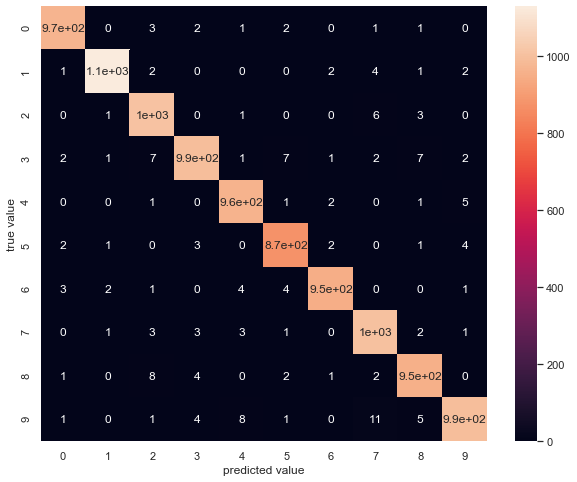

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_predict_result, test_labels_result)

plt.figure(figsize=(10,8))
sns.heatmap(mat, square=False, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 

#### This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. 

+ This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in less than 20 lines of Python code. 

##  (2) Fully-Connected Deep Network

#### Building a Fully-Conneted Deep Network with 2 hidden layers :

>`from keras import models`

>`from keras import layers`

>`network = models.Sequential()`

>`network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))`

>**`network.add(layers.Dense(128, activation='relu'))`**

>`network.add(layers.Dense(10, activation='softmax'))`

### Q : Is there any improvement on accuracy?